In [ ]:
%cd ../

In [2]:
from tvDatafeed import TvDatafeed, Interval
from dotenv import load_dotenv
import os
import pandas as pd
import pyutil
import backtrader as bt
import numpy as np
import talib as ta
import json
import pickle
import datetime
from tabulate import tabulate
from prettytable import PrettyTable
import tenxsqueeze as txs
import inspect
import seaborn as sns
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("mtf_consecutive.pkl").dropna()
epsilon = 0.001
df["PLr"] = (np.log(df["max"] + epsilon) - np.log(-df["min"] + epsilon))
df["PLd"] = df["max"] + df["min"]

In [58]:
df.loc[df[(df.N == 6) & (df.n_tf == 2)][["ticker", "N"]].drop_duplicates().index].sort_values(["PLr", "PLd"], ascending=False)

,ticker,n_tf,N,T,min,max,final,start,end,dir,PLr,PLd
1960,FIS,2,6,5,0.000000,1.860841,1.860841,2023-07-27 15:30:00,2023-07-28 09:50:00,-1.0,7.529321,1.860841
820,T,2,6,5,0.000000,0.355366,0.142146,2023-08-04 09:40:00,2023-08-04 10:30:00,-1.0,5.875958,0.355366
2860,MPC,2,6,5,-0.008992,0.377664,0.224800,2023-06-20 14:45:00,2023-06-20 15:35:00,-1.0,3.634864,0.368672
1876,FSLR,2,6,5,-0.021826,0.649315,0.392863,2023-08-18 09:55:00,2023-08-18 10:45:00,-1.0,3.349569,0.627489
1040,CCL,2,6,5,-0.054945,1.208791,1.043956,2023-07-19 09:55:00,2023-07-19 10:45:00,1.0,3.073833,1.153846
3288,NDAQ,2,6,5,-0.018790,0.187899,0.187899,2023-08-29 12:30:00,2023-08-29 13:20:00,1.0,2.256041,0.169109
4416,TJX,2,6,5,-0.046740,0.327179,0.093480,2023-07-20 09:50:00,2023-07-20 10:40:00,1.0,1.927793,0.280439
4368,TSLA,2,6,5,-0.085879,0.537675,0.235233,2023-07-11 13:40:00,2023-07-11 14:30:00,-1.0,1.824600,0.451796
152,ATVI,2,6,5,-0.010861,0.043445,0.000000,2023-09-06 13:15:00,2023-09-06 14:05:00,1.0,1.320976,0.032584
3264,MS,2,6,5,-0.053658,0.131163,0.107315,2023-06-28 14:45:00,2023-06-28 15:35:00,-1.0,0.882948,0.077506


In [6]:
df.sort_values("PLd")

,ticker,n_tf,N,T,min,max,final,start,end,dir,PLr,PLd
1047,CCL,2,6,30,-6.823028,0.479744,-4.371002,2023-07-31 15:15:00,2023-08-01 11:40:00,1.0,-2.652870,-6.343284
1039,CCL,2,5,30,-6.773333,0.533333,-4.293333,2023-07-31 15:15:00,2023-08-01 11:35:00,1.0,-2.539876,-6.240000
1003,CCL,2,1,30,-6.723586,0.586980,-5.016009,2023-07-31 15:15:00,2023-08-01 11:15:00,1.0,-2.436833,-6.136606
1015,CCL,2,2,30,-6.723586,0.586980,-5.122732,2023-07-31 15:15:00,2023-08-01 11:20:00,1.0,-2.436833,-6.136606
1023,CCL,2,3,30,-6.698692,0.613824,-4.670403,2023-07-31 15:15:00,2023-08-01 11:25:00,1.0,-2.388480,-6.084868
...,...,...,...,...,...,...,...,...,...,...,...,...
2362,IBM,2,1,15,-0.345893,3.252870,2.612599,2023-07-19 15:25:00,2023-07-20 10:10:00,1.0,2.238583,2.906977
2299,HBAN,2,1,30,-0.045434,3.044071,1.499318,2023-07-11 14:50:00,2023-07-12 10:50:00,1.0,4.183250,2.998637
571,AMD,2,2,30,-0.252064,3.320296,3.137766,2023-07-13 13:40:00,2023-07-14 09:45:00,1.0,2.574467,3.068231
3443,NCLH,2,1,30,-0.144844,3.244496,2.317497,2023-08-16 14:45:00,2023-08-17 10:45:00,-1.0,3.102489,3.099652


# High PLd - LUV 15m x2 - PLd = 3.4
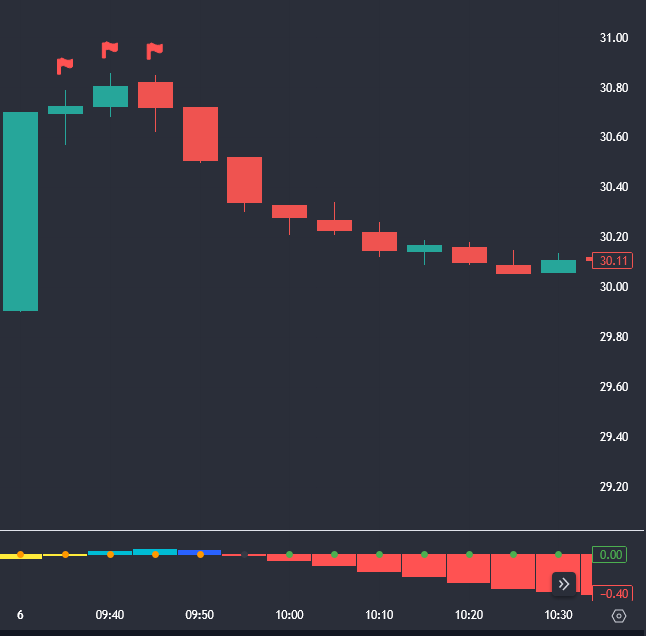

In [9]:
df.sort_values("PLr")

,ticker,n_tf,N,T,min,max,final,start,end,dir,PLr,PLd
3047,MRNA,2,1,30,-3.373222,0.000000,-3.354377,2023-08-18 09:50:00,2023-08-18 12:20:00,1.0,-8.123920,-3.373222
2311,HBAN,2,1,30,-3.252385,0.000000,-2.688638,2023-07-13 15:55:00,2023-07-14 11:55:00,1.0,-8.087451,-3.252385
2310,HBAN,2,1,15,-2.948829,0.000000,-2.862099,2023-07-13 15:55:00,2023-07-14 10:40:00,1.0,-7.989503,-2.948829
2309,HBAN,2,1,10,-2.688638,0.000000,-2.515178,2023-07-13 15:55:00,2023-07-14 10:15:00,1.0,-7.897162,-2.688638
3046,MRNA,2,1,15,-2.468670,0.000000,-1.884481,2023-08-18 09:50:00,2023-08-18 11:05:00,1.0,-7.811840,-2.468670
...,...,...,...,...,...,...,...,...,...,...,...,...
3599,PARA,2,1,30,0.000000,2.205882,1.002674,2023-08-30 10:40:00,2023-08-30 13:10:00,1.0,7.699336,2.205882
3953,RF,2,1,10,0.000000,2.662037,2.228009,2023-06-22 15:10:00,2023-06-23 09:30:00,-1.0,7.887222,2.662037
3954,RF,2,1,15,0.000000,2.662037,1.967593,2023-06-22 15:10:00,2023-06-23 09:55:00,-1.0,7.887222,2.662037
1963,FIS,2,6,30,0.000000,2.669903,2.491909,2023-07-27 15:30:00,2023-07-28 11:55:00,-1.0,7.890172,2.669903


# High PLr - FIS 5m x2 - PLr = 7.9
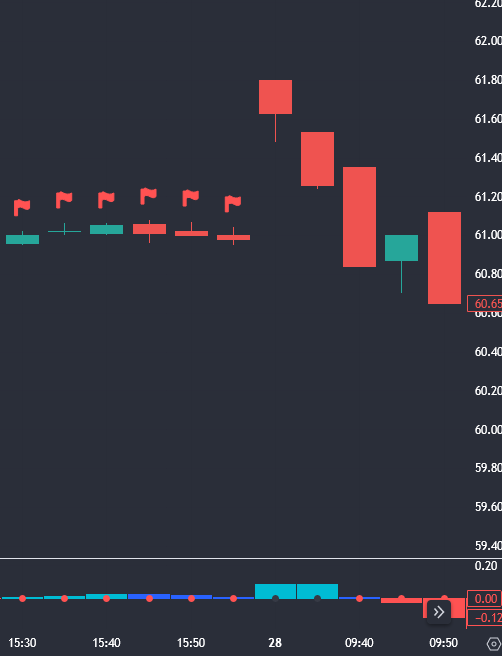

# PLr PLd Analysis

<Axes: xlabel='T', ylabel='N'>

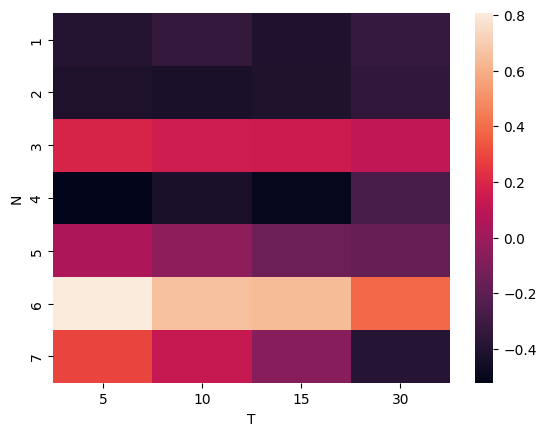

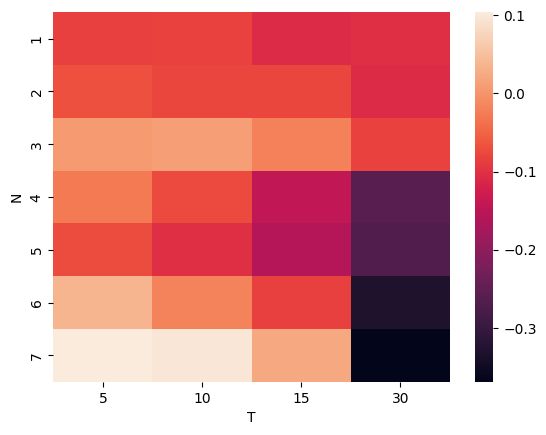

In [17]:
metrics_2 = df[df.n_tf == 2].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
sns.heatmap(metrics_2.PLr)
plt.figure()
sns.heatmap(metrics_2.PLd)

- N=6 is good for PLr
- No trend
- N=7 is good for PLd

428


<Axes: xlabel='T', ylabel='N'>

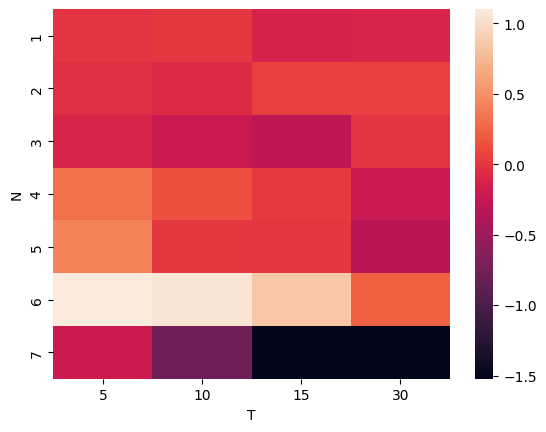

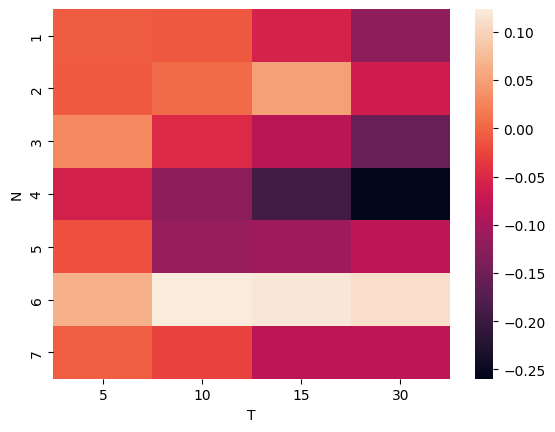

In [25]:
metrics_3 = df[df.n_tf == 3].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
print(len(df[df.n_tf == 3]))
sns.heatmap(metrics_3.PLr)
plt.figure()
sns.heatmap(metrics_3.PLd)

- N=6 is good for PLr and PLd
- No trend

104


<Axes: xlabel='T', ylabel='N'>

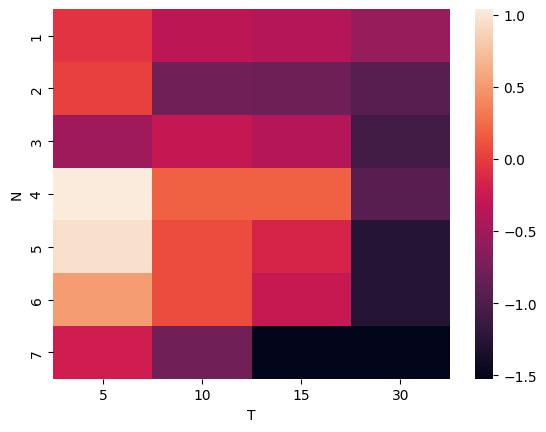

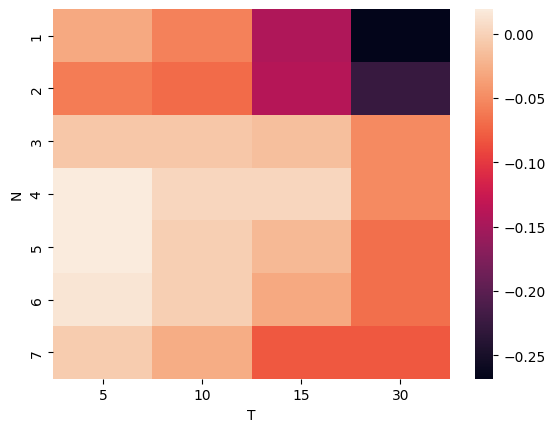

In [26]:
metrics_4 = df[df.n_tf == 4].pivot_table(index="N", columns="T", values=["PLr", "PLd"])
print(len(df[df.n_tf == 4]))
sns.heatmap(metrics_4.PLr)
plt.figure()
sns.heatmap(metrics_4.PLd)

- PLr is only good for short time horizons betewen N=4 and N=6
- PLd is pretty bad